# **Task - 6. Email Spam Filtering**
Use a dataset of emails and build a model that can identify spam emails.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Reading the Dataset**

In [ ]:
# Reading the csv file
email_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
# Displaying all data from dataframes
email_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# Checking the rows and columns of dataset
email_data.shape

(5572, 5)

In [ ]:
# Getting fisrt 5 rows
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
email_data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# **Data Inspection**

In [ ]:
# getting information about email data
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
email_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# Checking the missing values
email_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

- Here we see that 3 columns are untitled and they also contain 90% missing value so we simply deop them.

In [ ]:
# Dropping the last 3 untitled columns
email_data.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [ ]:
email_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


- The remaining the two columns not contain the proper name , we should rename it.

In [ ]:
# renaming the columns v1 and v2
email_data.rename(columns = {'v1': 'Category' , 'v2' : 'Message'} , inplace = True)

In [ ]:
email_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
email_data.isnull().sum()

Category    0
Message     0
dtype: int64

# **Label Encoding**

In [ ]:
# label spam mail = 0 , ham mail = 1
email_data.replace({'Category': {'spam':0 ,'ham':1}} , inplace = True)

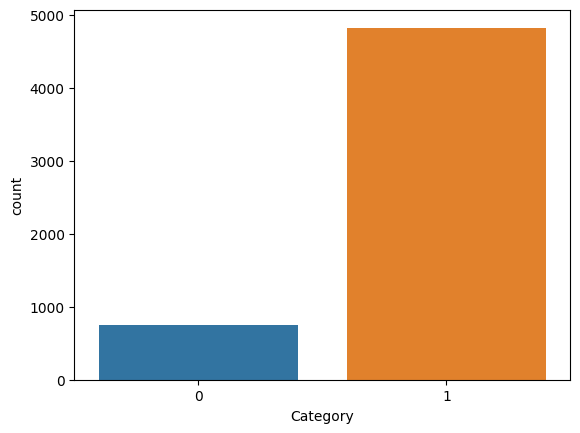

In [ ]:
sns.countplot(x='Category' , data=email_data)
plt.show()

In [ ]:
# seperating the data as text and labels
x = email_data['Message']
y = email_data['Category']

In [ ]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


# **Splitting the Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the data into train and test data
x_train , x_test , y_train ,y_test = train_test_split( x, y , test_size=0.2 , random_state=3)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


#  **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# transform the text data into feature vector used in logistic regression module
feature_extraction = TfidfVectorizer(min_df = 1 , stop_words='english' , lowercase=True)


In [ ]:
x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

# convert y_train annd y_test values as integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
print(x_train_feature)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

# **Training the Model**

- **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the logistic regression model
model.fit(x_train_feature , y_train)

LogisticRegression()

# **Evaluation of Model**

In [ ]:
# prediction on training data
prediction_on_train_data = model.predict(x_train_feature)
accuracy_on_train_data = accuracy_score(y_train , prediction_on_train_data)

In [ ]:
print('Accuracy Of Train Data :' , accuracy_on_train_data)

Accuracy Of Train Data : 0.9661207089970832


In [ ]:
# prediction on testing data
prediction_on_test_data = model.predict(x_test_feature)
accuracy_on_test_data = accuracy_score(y_test , prediction_on_test_data)

In [ ]:
print('Accuracy Of Test Data :' , accuracy_on_test_data)

Accuracy Of Test Data : 0.9623318385650225


- **Building a Prediction System**

In [ ]:
input_mail =["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

#convert text to feature vector
input_data_feature = feature_extraction.transform(input_mail)

# making prediction
prediction1 = model.predict(input_data_feature)
print(prediction1)

if prediction1[0]==1:
  print('It is ham mail')
else:
  print('It is spam mail')

[0]
It is spam mail


**Conclusion :**                  
Here we took an example and our model succesfully detected that the mail is 'spam' or 'ham'
